In [114]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from time import time

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import Callback, ModelCheckpoint

np.random.seed(1337)

df = pd.read_csv('/code/data/processed/proceeded_train_20200116_102618.csv', index_col=0)

In [120]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import lightgbm as lgb

# Importa os pacotes de algoritmos de redes neurais (Keras)
import keras
from keras.losses import binary_crossentropy, categorical_crossentropy
from keras.utils import to_categorical
from keras.layers import Dense,Input,Flatten,concatenate,Dropout,Lambda,BatchNormalization
from keras.layers import Activation
from keras.models import Sequential, Model
from keras.callbacks import Callback,EarlyStopping,ModelCheckpoint
import keras.backend as K
from keras.optimizers import Adam
#from keras_radam import RAdam
from keras import optimizers
from keras.utils import np_utils

# Importa pacotes do sklearn
from sklearn import preprocessing
import sklearn.metrics as mtr
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import scale, MinMaxScaler, StandardScaler
from sklearn import model_selection
from sklearn.utils import class_weight

In [14]:
importance = pd.read_csv('/code/models/lgb_proceeded_train_20200115_224055_20200116_083906/all_importance.csv', index_col=0)

In [16]:
importance.mean(axis=1).sort_values(ascending=False).head(20).index

Index(['session_title', 'label_session_title_count_accuracy_label',
       'count_accuracy', 'label_session_title_count_action_label', '2000',
       'mean_accuracy_group', '3afb49e6', 'acc_Bird Measurer (Assessment)',
       'Clip', 'mean_game_round',
       'label_mean_accuracy_group_label_description_val', 'good_comment_ratio',
       '4070', 'acc_Chest Sorter (Assessment)', '7372e1a5',
       'count_label_session_title_description_val', '04df9b66',
       'label_session_title_description_val', '3020', 'args_6'],
      dtype='object')

In [18]:
train_df = df[importance.mean(axis=1).sort_values(ascending=False).head(20).index]

In [20]:
train_df.describe()

,session_title,label_session_title_count_accuracy_label,count_accuracy,label_session_title_count_action_label,2000,mean_accuracy_group,3afb49e6,acc_Bird Measurer (Assessment),Clip,mean_game_round,label_mean_accuracy_group_label_description_val,good_comment_ratio,4070,acc_Chest Sorter (Assessment),7372e1a5,count_label_session_title_description_val,04df9b66,label_session_title_description_val,3020,args_6
count,17690.000000,17690.000000,17690.000000,17690.000000,17690.000000,17690.000000,17690.000000,17690.000000,17690.000000,17690.000000,17690.000000,17222.000000,17690.000000,17690.000000,17690.000000,17690.000000,17690.000000,17690.000000,17690.000000,17690.000000
mean,27.554607,11.242679,0.451256,25.422612,65.161504,1.423246,0.853759,-0.431142,34.065291,4.336716,85.900396,0.148884,497.390673,-0.449288,19.079254,383.457321,4.183607,81.562465,71.581854,147.737818
std,11.567658,7.552822,0.345540,14.863938,107.569244,1.051575,2.481780,0.707178,60.384708,3.482221,47.036591,0.119803,787.777281,0.648515,50.322420,269.270980,24.627534,51.533062,136.723423,229.114390
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,5.000000,0.012862,14.000000,13.000000,0.106725,0.000000,-1.000000,7.000000,2.400000,39.000000,0.077778,70.000000,-1.000000,0.000000,164.000000,0.000000,33.000000,6.000000,19.000000
50%,30.000000,11.000000,0.500000,26.000000,31.000000,1.500000,0.000000,-1.000000,16.000000,4.000000,101.000000,0.121096,220.000000,-1.000000,3.000000,324.000000,0.000000,76.000000,25.000000,67.000000
75%,39.000000,18.000000,0.714286,38.000000,72.000000,2.250000,0.000000,0.062500,36.000000,5.764706,130.000000,0.184312,590.000000,0.000000,18.000000,604.000000,1.000000,125.000000,74.000000,175.000000
max,42.000000,24.000000,1.000000,49.000000,1257.000000,3.000000,28.000000,1.000000,772.000000,72.000000,158.000000,1.071429,11240.000000,1.000000,858.000000,959.000000,340.000000,158.000000,1753.000000,2339.000000


In [23]:
from sklearn.preprocessing import PowerTransformer

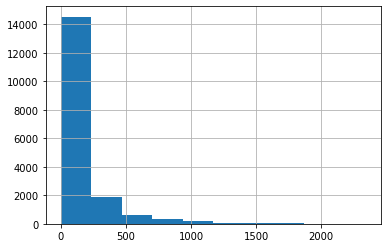

In [22]:
train_df.args_6.hist()

In [25]:
train_df.columns

Index(['session_title', 'label_session_title_count_accuracy_label',
       'count_accuracy', 'label_session_title_count_action_label', '2000',
       'mean_accuracy_group', '3afb49e6', 'acc_Bird Measurer (Assessment)',
       'Clip', 'mean_game_round',
       'label_mean_accuracy_group_label_description_val', 'good_comment_ratio',
       '4070', 'acc_Chest Sorter (Assessment)', '7372e1a5',
       'count_label_session_title_description_val', '04df9b66',
       'label_session_title_description_val', '3020', 'args_6'],
      dtype='object')

In [27]:
pt_columns = ['args_6','count_accuracy','2000','mean_accuracy_group', '3afb49e6', 'acc_Bird Measurer (Assessment)','Clip', 'mean_game_round','good_comment_ratio','4070', 'acc_Chest Sorter (Assessment)', '7372e1a5', 'count_label_session_title_description_val', '04df9b66','3020']
pt = PowerTransformer()
pt.fit(train_df[pt_columns])
train_df[pt_columns] = pt.transform(train_df[pt_columns])

/root/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [32]:
cat_columns = ['session_title', 'label_session_title_count_accuracy_label', 'label_session_title_count_action_label', 'label_mean_accuracy_group_label_description_val', 'label_session_title_description_val']
train_df = pd.get_dummies(train_df, columns=cat_columns)

In [108]:
train_df.good_comment_ratio = train_df.good_comment_ratio.fillna(0)

In [138]:
y = df.accuracy_group

In [167]:
pd.DataFrame([[np.nan,np.nan,np.nan,np.nan],[np.nan,np.nan,np.nan,np.nan]]).fillna(0)

,0,1,2,3
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0


In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test, y_train, y_test = train_test_split(train_df, y)

In [141]:
X_train.head()

,count_accuracy,2000,mean_accuracy_group,3afb49e6,acc_Bird Measurer (Assessment),Clip,mean_game_round,good_comment_ratio,4070,acc_Chest Sorter (Assessment),...,label_session_title_description_val_149,label_session_title_description_val_150,label_session_title_description_val_151,label_session_title_description_val_152,label_session_title_description_val_153,label_session_title_description_val_154,label_session_title_description_val_155,label_session_title_description_val_156,label_session_title_description_val_157,label_session_title_description_val_158
14673,0.270854,1.877015,0.391296,1.984325,0.842338,1.896525,1.050478,-0.145138,1.652449,1.390630,...,0,0,0,0,0,0,0,0,0,0
11508,0.136005,2.803758,0.127986,2.048594,0.842338,2.957694,-0.152902,-0.566783,2.688405,0.856423,...,0,0,0,0,0,0,0,0,0,0
8194,0.458680,1.031934,0.578611,2.048594,0.842338,1.046106,-0.438323,-0.379509,0.293363,1.007194,...,0,0,0,0,0,0,0,0,0,0
5049,-0.006604,0.656959,-0.026971,-0.495870,1.176066,0.666817,-0.891856,-0.092529,0.513127,0.856423,...,0,0,0,0,0,0,0,0,0,0
13018,0.539050,0.214364,0.578611,1.984325,-0.842559,0.428077,-0.090025,0.794502,-0.199683,1.145086,...,0,0,0,0,0,0,0,0,0,0


In [122]:
def quadratic_kappa(actuals, preds, N=4):
    """This function calculates the Quadratic Kappa Metric used for Evaluation in the PetFinder competition
    at Kaggle. It returns the Quadratic Weighted Kappa metric score between the actual and the predicted values 
    of adoption rating."""
    w = np.zeros((N,N))
    O = confusion_matrix(actuals, preds)
    for i in range(len(w)): 
        for j in range(len(w)):
            w[i][j] = float(((i-j)**2)/(N-1)**2)
    
    act_hist=np.zeros([N])
    for item in actuals: 
        act_hist[item]+=1
    
    pred_hist=np.zeros([N])
    for item in preds: 
        pred_hist[item]+=1
                         
    E = np.outer(act_hist, pred_hist);
    E = E/E.sum();
    O = O/O.sum();
    
    num=0
    den=0
    for i in range(len(w)):
        for j in range(len(w)):
            num+=w[i][j]*O[i][j]
            den+=w[i][j]*E[i][j]
    return (1 - (num/den))

In [152]:
def get_nn(x_tr,y_tr,x_val,y_val,shape):
    K.clear_session()
    
    inp = Input(shape = (x_tr.shape[1],))

    x = Dense(1024, input_dim=x_tr.shape[1], activation='relu')(inp)
    x = Dropout(0.5)(x)    
    x = BatchNormalization()(x)
    
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)    
    x = BatchNormalization()(x)
    
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)
    
    out = Dense(1)(x)

    model = Model(inp,out)
    
    model.compile(optimizer = 'Adam',
                  loss='mse')
     
    es = EarlyStopping(monitor='val_loss', 
                       mode='min',
                       restore_best_weights=True, 
                       verbose=1, 
                       patience=20)

    mc = ModelCheckpoint('best_model.h5',
                         monitor='val_loss',
                         mode='min',
                         save_best_only=True, 
                         verbose=1, 
                         save_weights_only=True)
    
    model.fit(x_tr, y_tr,
              validation_data=[x_val, y_val],
              callbacks=[es,mc],
              epochs=100, 
              batch_size=128,
              verbose=1,
              class_weight=class_weight_y,
              shuffle=True)
    
    model.load_weights("best_model.h5")
    
    y_pred = model.predict(x_val)

    def threshold(x, params):
        if x < params['threshold_0']:
            y = 0
        elif x < params['threshold_1']:
            y = 1
        elif x < params['threshold_2']:
            y = 2
        else:
            y = 3
        return y

    params = {
        'threshold_0': 1.12,
        'threshold_1': 1.62,
        'threshold_2': 2.20
        },

    func = np.frompyfunc(threshold, 2, 1)
    test_pred = func(y_pred, params)
    loss = qwk(test_pred, y_val)
    print(loss[0])
    # y_valid = y_val
    
    # kappa = quadratic_kappa(y_valid.argmax(axis=1), y_pred.argmax(axis=1))

    return model, loss

In [153]:
class_weight_y = class_weight.compute_class_weight('balanced', np.unique(df.accuracy_group), df.accuracy_group)
nn, kappa_nn = get_nn(X_train, y_train, X_test, y_test, shape=X_test.shape[0])

Train on 13267 samples, validate on 4423 samples
Epoch 1/100
13267/13267 [==============================] - 2s 131us/step - loss: 3.6927 - val_loss: 1.3235

Epoch 00001: val_loss improved from inf to 1.32351, saving model to best_model.h5
Epoch 2/100
13267/13267 [==============================] - 1s 102us/step - loss: 1.8892 - val_loss: 1.1873

Epoch 00002: val_loss improved from 1.32351 to 1.18734, saving model to best_model.h5
Epoch 3/100
13267/13267 [==============================] - 1s 103us/step - loss: 1.5253 - val_loss: 1.0950

Epoch 00003: val_loss improved from 1.18734 to 1.09496, saving model to best_model.h5
Epoch 4/100
13267/13267 [==============================] - 1s 103us/step - loss: 1.3378 - val_loss: 1.0480

Epoch 00004: val_loss improved from 1.09496 to 1.04802, saving model to best_model.h5
Epoch 5/100
13267/13267 [==============================] - 1s 101us/step - loss: 1.2430 - val_loss: 1.0391

Epoch 00005: val_loss improved from 1.04802 to 1.03906, saving model to

In [154]:
kappa_nn

array([0.56419026])

In [155]:
nn.predict(X_train)

array([[1.451826 ],
       [1.8719517],
       [2.292779 ],
       ...,
       [2.5712135],
       [2.886535 ],
       [0.656215 ]], dtype=float32)

In [133]:
import matplotlib.pyplot as plt

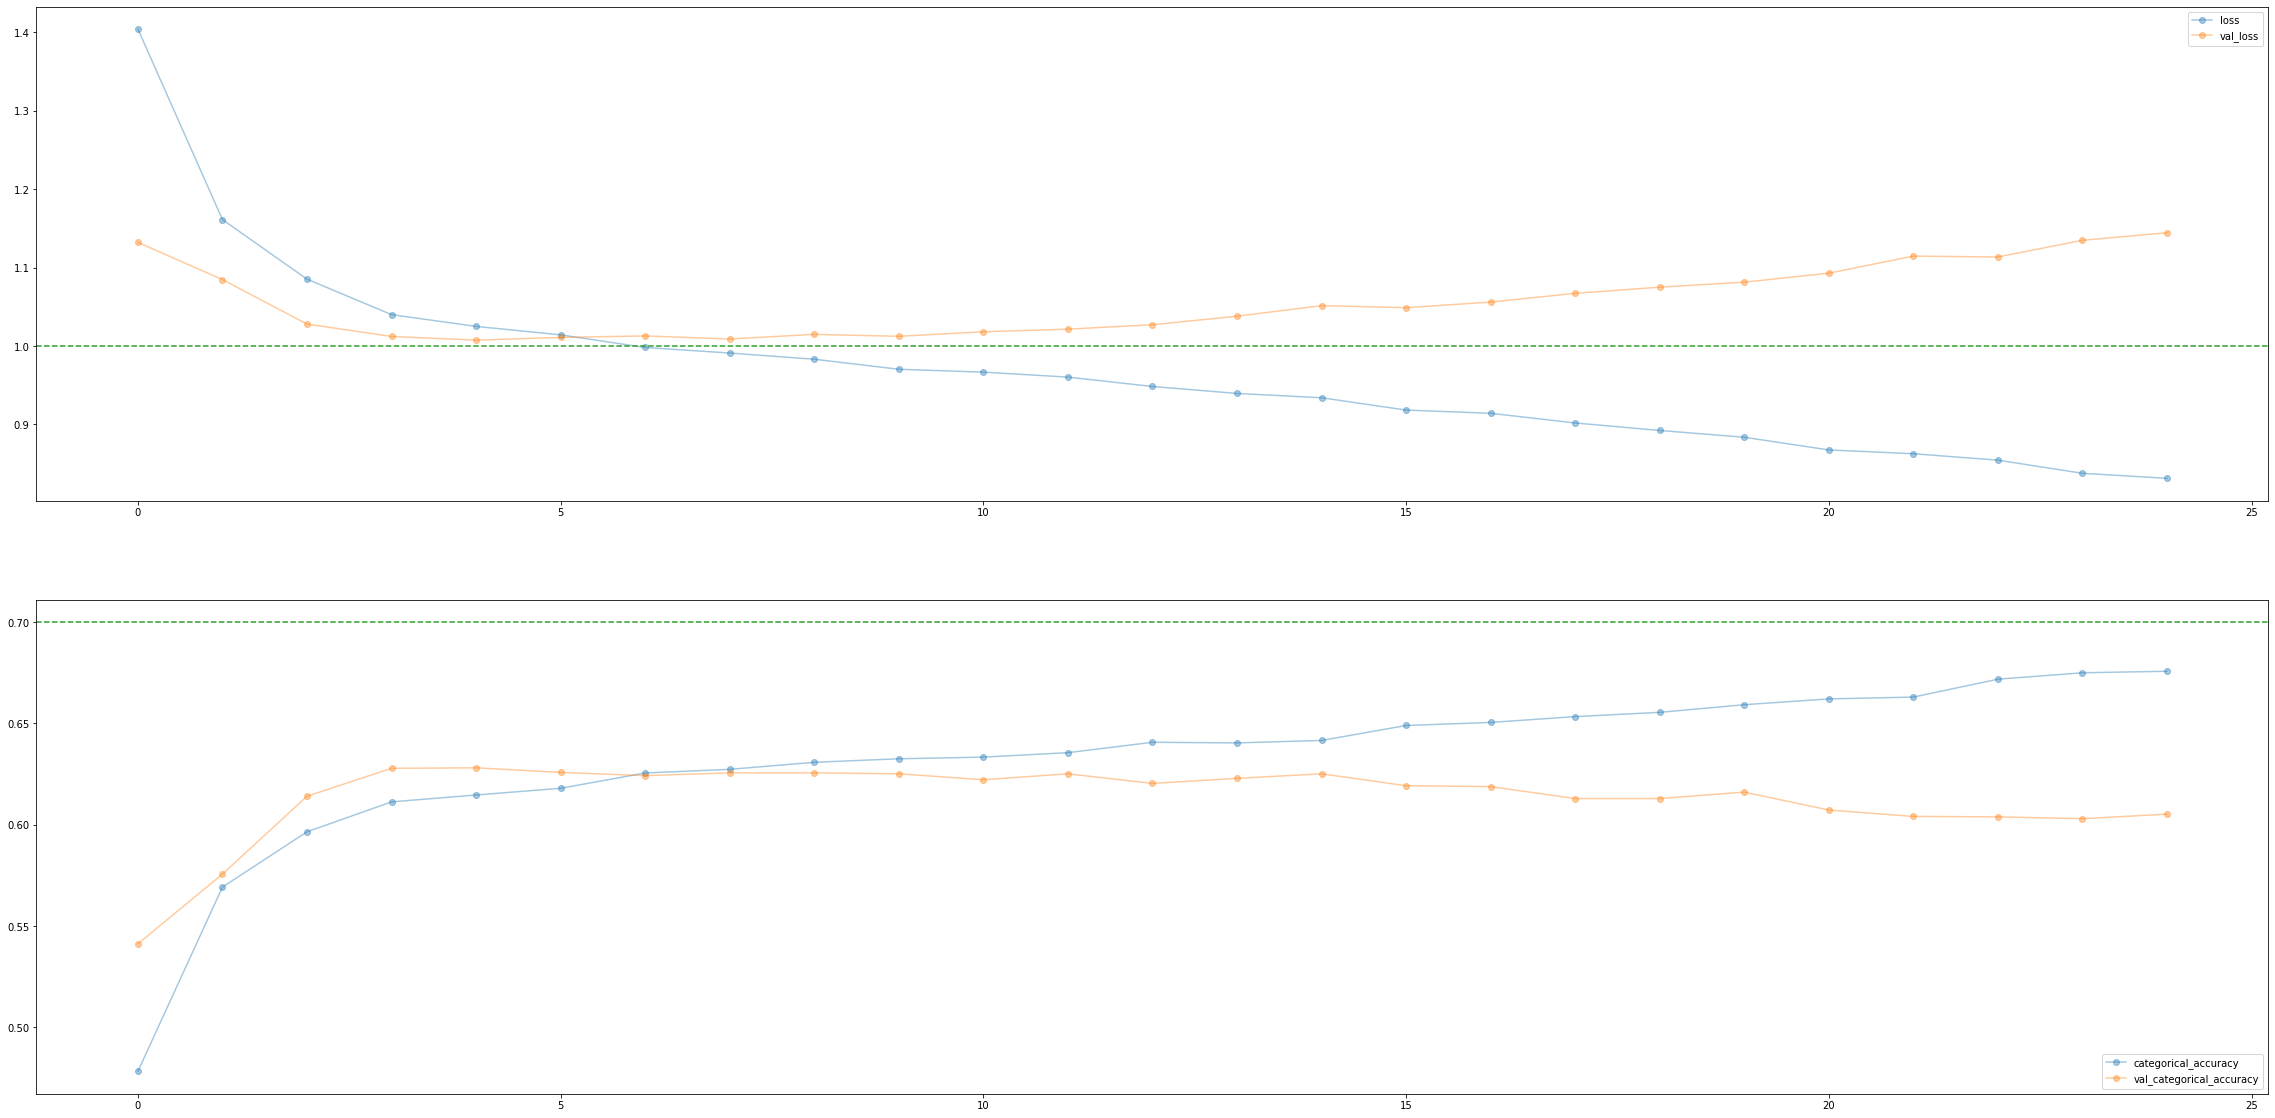

In [135]:
plt.figure(figsize=(40, 20))
plt.subplot(2, 1, 1)
plt.plot(nn.history.history["loss"], "o-", alpha=.4, label="loss")
plt.plot(nn.history.history["val_loss"], "o-", alpha=.4, label="val_loss")
plt.axhline(1, linestyle="--", c="C2")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(nn.history.history["categorical_accuracy"], "o-", alpha=.4, label="categorical_accuracy")
plt.plot(nn.history.history["val_categorical_accuracy"], "o-", alpha=.4, label="val_categorical_accuracy")
plt.axhline(.7, linestyle="--", c="C2")
plt.legend()
plt.show()